/tmp/ipykernel_13565/297351446.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


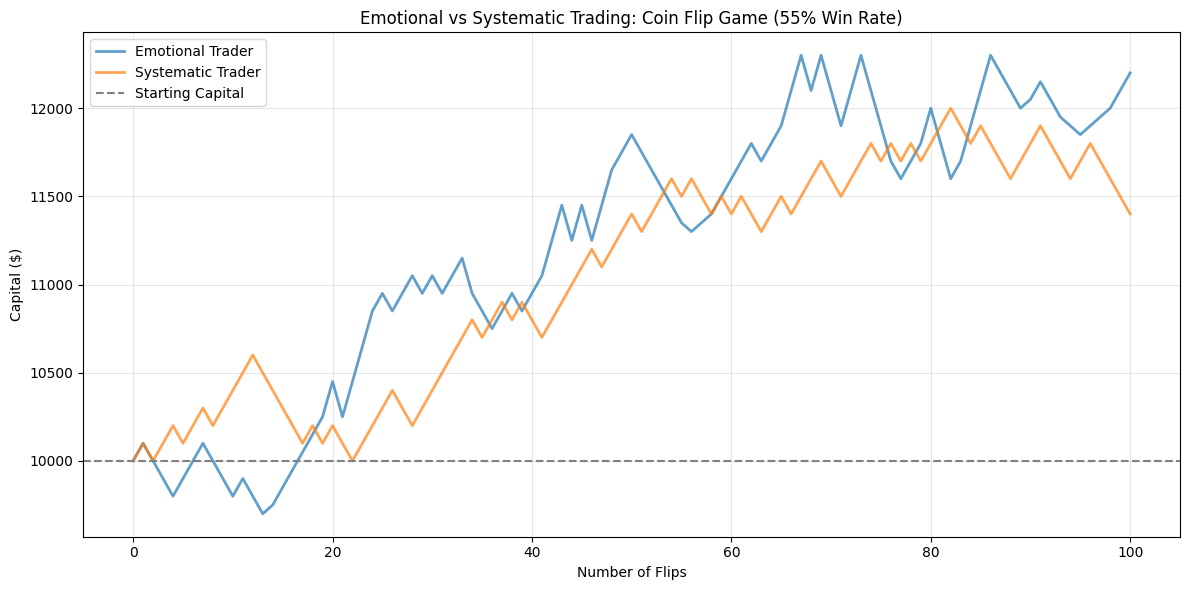


Final Results after 100 flips:
Emotional Trader: $12,200.00 (+22.0%)
Systematic Trader: $11,400.00 (+14.0%)

Expected profit: $1,000.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulation parameters
n_flips = 100
win_probability = 0.55  # Slight edge (like a good trading strategy)
initial_capital = 10000

def emotional_trader(n_flips, win_prob, initial_capital):
    """Simulates an emotional trader who varies bet size based on recent results"""
    capital = initial_capital
    equity_curve = [capital]
    
    base_bet = 100
    recent_wins = 0  # Track recent performance
    
    for i in range(n_flips):
        # Vary bet size based on recent wins
        if recent_wins >= 3:
            bet = base_bet * 2  # "I'm on a hot streak!"
        elif recent_wins <= -3:
            bet = base_bet * 0.5  # "I need to be cautious"
        else:
            bet = base_bet
        
        # Flip coin
        win = np.random.random() < win_prob
        
        if win:
            capital += bet
            recent_wins += 1
        else:
            capital -= bet
            recent_wins -= 1
        
        # Reset counter if too extreme
        if abs(recent_wins) > 5:
            recent_wins = 0
        
        equity_curve.append(capital)
    
    return equity_curve

def systematic_trader(n_flips, win_prob, initial_capital):
    """Simulates a systematic trader with fixed bet size"""
    capital = initial_capital
    equity_curve = [capital]
    
    bet = 100  # Always the same
    
    for i in range(n_flips):
        win = np.random.random() < win_prob
        
        if win:
            capital += bet
        else:
            capital -= bet
        
        equity_curve.append(capital)
    
    return equity_curve

# Run simulations
emotional_equity = emotional_trader(n_flips, win_probability, initial_capital)
systematic_equity = systematic_trader(n_flips, win_probability, initial_capital)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(emotional_equity, label='Emotional Trader', alpha=0.7, linewidth=2)
plt.plot(systematic_equity, label='Systematic Trader', alpha=0.7, linewidth=2)
plt.axhline(y=initial_capital, color='gray', linestyle='--', label='Starting Capital')
plt.xlabel('Number of Flips')
plt.ylabel('Capital ($)')
plt.title('Emotional vs Systematic Trading: Coin Flip Game (55% Win Rate)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nFinal Results after {n_flips} flips:")
print(f"Emotional Trader: ${emotional_equity[-1]:,.2f} ({(emotional_equity[-1]/initial_capital - 1)*100:+.1f}%)")
print(f"Systematic Trader: ${systematic_equity[-1]:,.2f} ({(systematic_equity[-1]/initial_capital - 1)*100:+.1f}%)")
print(f"\nExpected profit: ${n_flips * 100 * (win_probability - 0.5) * 2:,.2f}")

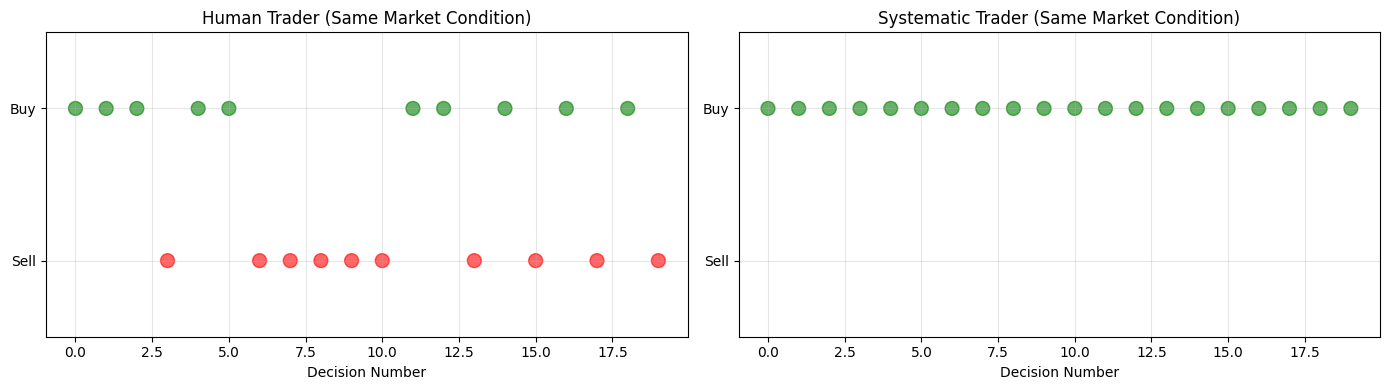

Human trader made 10/20 buy decisions
Systematic trader made 20/20 buy decisions

Inconsistency: Human varied despite identical market conditions!


In [2]:
# Demonstration: Human inconsistency in decision-making
import random

def human_decision(market_condition, mood):
    """Simulates inconsistent human decision making"""
    if mood == 'confident':
        threshold = 0.3  # Lower bar for buying
    elif mood == 'scared':
        threshold = 0.8  # Higher bar for buying
    else:
        threshold = 0.5
    
    return market_condition > threshold

def systematic_decision(market_condition):
    """Consistent systematic decision"""
    return market_condition > 0.5  # Always the same threshold

# Simulate 20 decision points with the same market conditions
market_conditions = [0.6] * 20  # Same condition repeated
moods = random.choices(['confident', 'neutral', 'scared'], k=20)

human_decisions = [human_decision(mc, mood) for mc, mood in zip(market_conditions, moods)]
systematic_decisions = [systematic_decision(mc) for mc in market_conditions]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.scatter(range(20), human_decisions, c=['green' if d else 'red' for d in human_decisions], 
            s=100, alpha=0.6)
ax1.set_ylim(-0.5, 1.5)
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['Sell', 'Buy'])
ax1.set_xlabel('Decision Number')
ax1.set_title('Human Trader (Same Market Condition)')
ax1.grid(alpha=0.3)

ax2.scatter(range(20), systematic_decisions, c=['green' if d else 'red' for d in systematic_decisions],
            s=100, alpha=0.6)
ax2.set_ylim(-0.5, 1.5)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Sell', 'Buy'])
ax2.set_xlabel('Decision Number')
ax2.set_title('Systematic Trader (Same Market Condition)')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Human trader made {sum(human_decisions)}/{len(human_decisions)} buy decisions")
print(f"Systematic trader made {sum(systematic_decisions)}/{len(systematic_decisions)} buy decisions")
print(f"\nInconsistency: Human varied despite identical market conditions!")

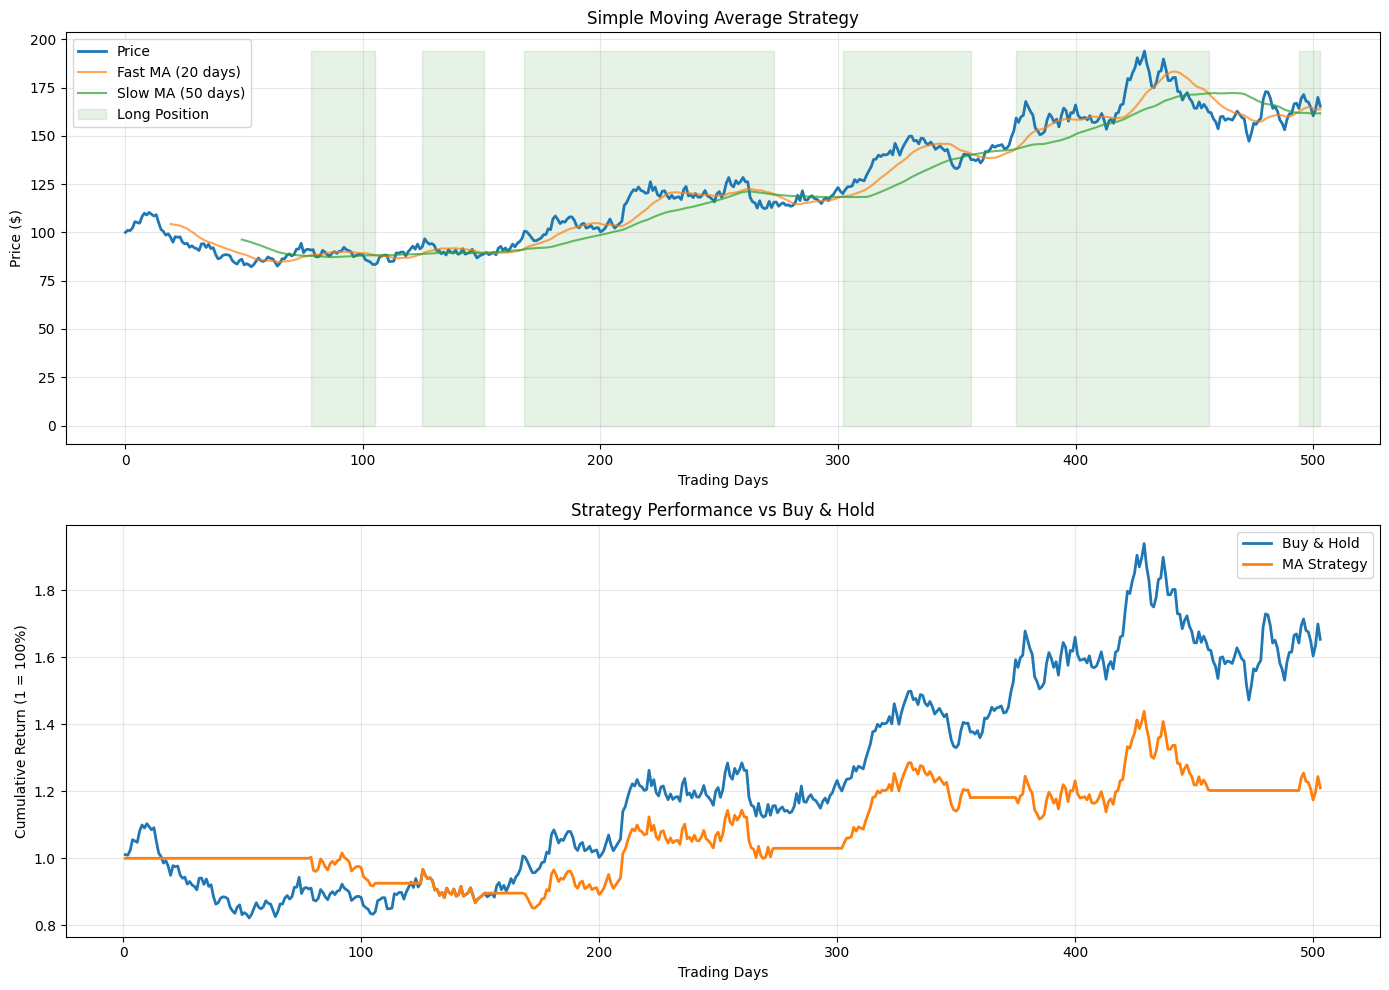

Buy & Hold Return: 65.33%
Strategy Return: 21.03%

Note: This is a simple example. Real backtesting includes costs, slippage, etc.


In [3]:
# Simple backtest preview - we'll build the full system later!
# For now, let's just show the concept with synthetic data

# Generate synthetic price data
np.random.seed(42)
days = 252 * 2  # 2 years of trading days
price = 100
prices = [price]

for _ in range(days - 1):
    # Random walk with slight upward drift
    change = np.random.normal(0.001, 0.02)  # 0.1% drift, 2% volatility
    price = price * (1 + change)
    prices.append(price)

prices = pd.Series(prices)

# Simple moving average strategy
fast_ma = prices.rolling(window=20).mean()
slow_ma = prices.rolling(window=50).mean()

# Generate signals
signal = (fast_ma > slow_ma).astype(int)  # 1 = buy, 0 = sell

# Calculate returns
returns = prices.pct_change()
strategy_returns = signal.shift(1) * returns  # Shift to avoid lookahead bias

# Calculate cumulative returns
buy_hold = (1 + returns).cumprod()
strategy = (1 + strategy_returns).cumprod()

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Price and moving averages
ax1.plot(prices.values, label='Price', linewidth=2)
ax1.plot(fast_ma.values, label='Fast MA (20 days)', alpha=0.7)
ax1.plot(slow_ma.values, label='Slow MA (50 days)', alpha=0.7)
ax1.fill_between(range(len(signal)), 0, prices.max(), 
                 where=signal==1, alpha=0.1, color='green', label='Long Position')
ax1.set_xlabel('Trading Days')
ax1.set_ylabel('Price ($)')
ax1.set_title('Simple Moving Average Strategy')
ax1.legend()
ax1.grid(alpha=0.3)

# Performance comparison
ax2.plot(buy_hold.values, label='Buy & Hold', linewidth=2)
ax2.plot(strategy.values, label='MA Strategy', linewidth=2)
ax2.set_xlabel('Trading Days')
ax2.set_ylabel('Cumulative Return (1 = 100%)')
ax2.set_title('Strategy Performance vs Buy & Hold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Buy & Hold Return: {(buy_hold.iloc[-1] - 1)*100:.2f}%")
print(f"Strategy Return: {(strategy.iloc[-1] - 1)*100:.2f}%")
print(f"\nNote: This is a simple example. Real backtesting includes costs, slippage, etc.")

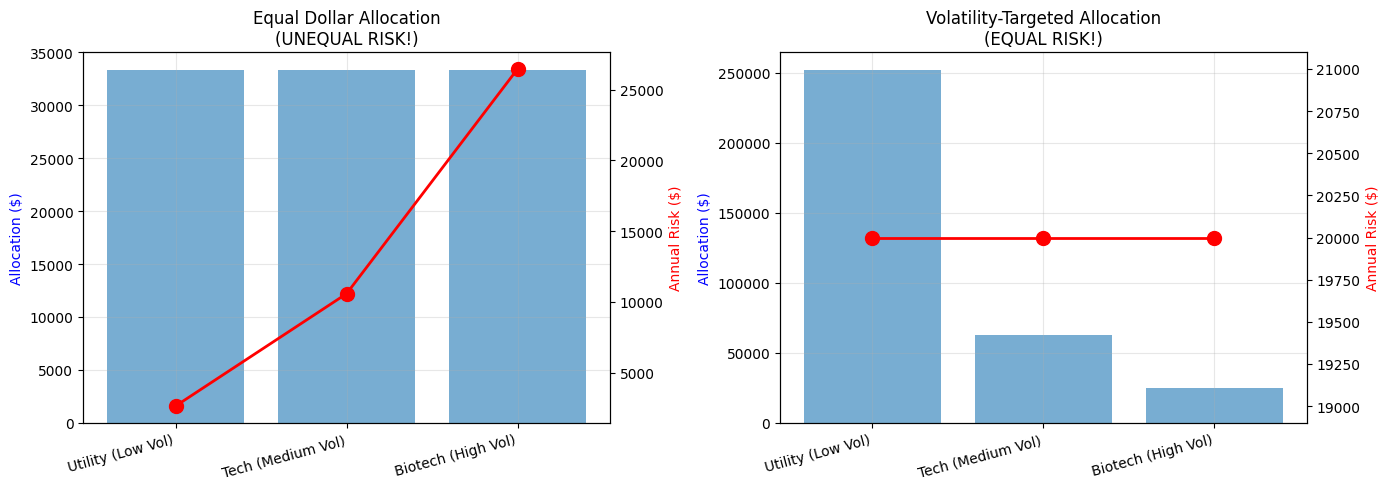


Equal Dollar Allocation:
             Stock  Equal $ Allocation  Equal $ Risk
 Utility (Low Vol)        33333.333333   2645.751311
 Tech (Medium Vol)        33333.333333  10583.005244
Biotech (High Vol)        33333.333333  26457.513111

Risk range: $2646 to $26458
Risk ratio: 10.0x


Volatility-Targeted Allocation:
             Stock  Vol-Targeted Allocation  Vol-Targeted Risk
 Utility (Low Vol)            251976.315339            20000.0
 Tech (Medium Vol)             62994.078835            20000.0
Biotech (High Vol)             25197.631534            20000.0

All positions have equal risk: ~$20000


In [4]:
# Demonstration: Volatility Targeting

# Three stocks with different volatilities
stocks = {
    'Utility (Low Vol)': {'price': 100, 'daily_vol': 0.005},  # 0.5% daily
    'Tech (Medium Vol)': {'price': 100, 'daily_vol': 0.020},  # 2% daily
    'Biotech (High Vol)': {'price': 100, 'daily_vol': 0.050}, # 5% daily
}

capital = 100000
target_vol = 0.20  # 20% annual volatility target

# Equal dollar allocation (WRONG)
equal_allocation = capital / 3

# Volatility-based allocation (RIGHT)
results = []

for name, data in stocks.items():
    # Equal dollar risk
    shares_equal = equal_allocation / data['price']
    risk_equal = equal_allocation * data['daily_vol'] * np.sqrt(252)
    
    # Volatility targeted
    annual_vol = data['daily_vol'] * np.sqrt(252)
    target_position = (capital * target_vol) / (data['price'] * annual_vol)
    allocation_vol = target_position * data['price']
    risk_vol = allocation_vol * annual_vol
    
    results.append({
        'Stock': name,
        'Equal $ Allocation': equal_allocation,
        'Equal $ Risk': risk_equal,
        'Vol-Targeted Allocation': allocation_vol,
        'Vol-Targeted Risk': risk_vol
    })

df_results = pd.DataFrame(results)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Equal dollar allocation
x = range(len(df_results))
ax1.bar(x, df_results['Equal $ Allocation'], alpha=0.6, label='Allocation')
ax1_twin = ax1.twinx()
ax1_twin.plot(x, df_results['Equal $ Risk'], 'ro-', linewidth=2, markersize=10, label='Risk')
ax1.set_xticks(x)
ax1.set_xticklabels(df_results['Stock'], rotation=15, ha='right')
ax1.set_ylabel('Allocation ($)', color='b')
ax1_twin.set_ylabel('Annual Risk ($)', color='r')
ax1.set_title('Equal Dollar Allocation\n(UNEQUAL RISK!)')
ax1.grid(alpha=0.3)

# Volatility-targeted allocation
ax2.bar(x, df_results['Vol-Targeted Allocation'], alpha=0.6, label='Allocation')
ax2_twin = ax2.twinx()
ax2_twin.plot(x, df_results['Vol-Targeted Risk'], 'ro-', linewidth=2, markersize=10, label='Risk')
ax2.set_xticks(x)
ax2.set_xticklabels(df_results['Stock'], rotation=15, ha='right')
ax2.set_ylabel('Allocation ($)', color='b')
ax2_twin.set_ylabel('Annual Risk ($)', color='r')
ax2.set_title('Volatility-Targeted Allocation\n(EQUAL RISK!)')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEqual Dollar Allocation:")
print(df_results[['Stock', 'Equal $ Allocation', 'Equal $ Risk']].to_string(index=False))
print(f"\nRisk range: ${df_results['Equal $ Risk'].min():.0f} to ${df_results['Equal $ Risk'].max():.0f}")
print(f"Risk ratio: {df_results['Equal $ Risk'].max() / df_results['Equal $ Risk'].min():.1f}x\n")

print("\nVolatility-Targeted Allocation:")
print(df_results[['Stock', 'Vol-Targeted Allocation', 'Vol-Targeted Risk']].to_string(index=False))
print(f"\nAll positions have equal risk: ~${df_results['Vol-Targeted Risk'].mean():.0f}")

In [5]:
# Let's explore the repository structure
import os
from pathlib import Path

# Go up two levels from book directory to repo root
repo_root = Path.cwd().parent.parent if 'book' in str(Path.cwd()) else Path.cwd().parent

def show_tree(directory, prefix="", max_depth=3, current_depth=0):
    """Display directory tree"""
    if current_depth >= max_depth:
        return
    
    try:
        contents = sorted(directory.iterdir())
    except PermissionError:
        return
    
    # Filter out unwanted directories
    ignore = {'.git', '__pycache__', '.pytest_cache', 'logs', '.venv', 'venv', '_build'}
    contents = [c for c in contents if c.name not in ignore and not c.name.startswith('.')]
    
    for i, path in enumerate(contents):
        is_last = i == len(contents) - 1
        current_prefix = "└── " if is_last else "├── "
        print(f"{prefix}{current_prefix}{path.name}")
        
        if path.is_dir():
            extension = "    " if is_last else "│   "
            show_tree(path, prefix + extension, max_depth, current_depth + 1)

print("Repository Structure:")
print(repo_root.name)
show_tree(repo_root, max_depth=2)

Repository Structure:
systematic_trading
├── ARCHITECTURE.md
├── BOOK_QUICKSTART.md
├── DEVELOPERS_GUIDE.md
├── INDEX.md
├── PROJECT_SUMMARY.md
├── QUICK_REFERENCE.md
├── README.md
├── SETUP.md
├── SYSTEMATIC_TRADING_BOOK.md
├── backtesting
│   ├── __init__.py
│   ├── backtest_engine.py
│   └── performance.py
├── book
│   ├── CONTRIBUTING.md
│   ├── FRAMEWORK_SUMMARY.md
│   ├── Makefile
│   ├── README.md
│   ├── VISUAL_STRUCTURE.txt
│   ├── _config.yml
│   ├── _static
│   ├── _toc.yml
│   ├── appendix
│   ├── images
│   ├── intro.md
│   ├── part1
│   ├── part2
│   ├── part3
│   ├── part4
│   ├── part5
│   ├── requirements.txt
│   └── setup_book.sh
├── config
│   ├── __init__.py
│   └── settings.py
├── data
│   ├── __init__.py
│   ├── data_manager.py
│   └── historical
├── equity_curve.png
├── main.py
├── positions.png
├── pytest.ini
├── requirements.txt
├── risk_management
│   ├── __init__.py
│   └── position_sizer.py
├── strategy
│   ├── __init__.py
│   ├── base_strategy.py
│   └── tr

In [6]:
# Note: This is a preview only - we'll implement each piece in detail later!
# For now, this shows the high-level workflow

print("""
Systematic Trading Workflow:
===========================

Step 1: Download Data
  ↓
  from data.data_manager import DataManager
  dm = DataManager()
  data = dm.download_stock_data('GOOG', save=True)

Step 2: Create Strategy
  ↓
  from strategy.trend_following import EWMAC
  strategy = EWMAC(fast_span=16, slow_span=64)
  signals = strategy.generate_signals(data)

Step 3: Size Positions
  ↓
  from risk_management.position_sizer import PositionSizer
  sizer = PositionSizer(capital=100000, volatility_target=0.20)
  position = sizer.calculate_position(signal, price, volatility)

Step 4: Run Backtest
  ↓
  from backtesting.backtest_engine import BacktestEngine
  engine = BacktestEngine(initial_capital=100000)
  results = engine.run(strategy, data, sizer)

Step 5: Analyze Performance
  ↓
  from backtesting.performance import PerformanceAnalyzer
  analyzer = PerformanceAnalyzer(results)
  analyzer.print_summary()
  analyzer.plot_equity_curve()

Each of these steps will be covered in detail in upcoming chapters!
""")


Systematic Trading Workflow:

Step 1: Download Data
  ↓
  from data.data_manager import DataManager
  dm = DataManager()
  data = dm.download_stock_data('GOOG', save=True)

Step 2: Create Strategy
  ↓
  from strategy.trend_following import EWMAC
  strategy = EWMAC(fast_span=16, slow_span=64)
  signals = strategy.generate_signals(data)

Step 3: Size Positions
  ↓
  from risk_management.position_sizer import PositionSizer
  sizer = PositionSizer(capital=100000, volatility_target=0.20)
  position = sizer.calculate_position(signal, price, volatility)

Step 4: Run Backtest
  ↓
  from backtesting.backtest_engine import BacktestEngine
  engine = BacktestEngine(initial_capital=100000)
  results = engine.run(strategy, data, sizer)

Step 5: Analyze Performance
  ↓
  from backtesting.performance import PerformanceAnalyzer
  analyzer = PerformanceAnalyzer(results)
  analyzer.print_summary()
  analyzer.plot_equity_curve()

Each of these steps will be covered in detail in upcoming chapters!

